In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import models
from torch.utils.data import DataLoader
import torch.nn as nn
from utils import FingerROIExtracter, PalmROIExtracter, EqualHist, CLAHE, AdaptiveThreshold, Gabor, OTSU, visulize
from finger_train import FingerDataset
from palm_train import PalmDataset

In [2]:
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

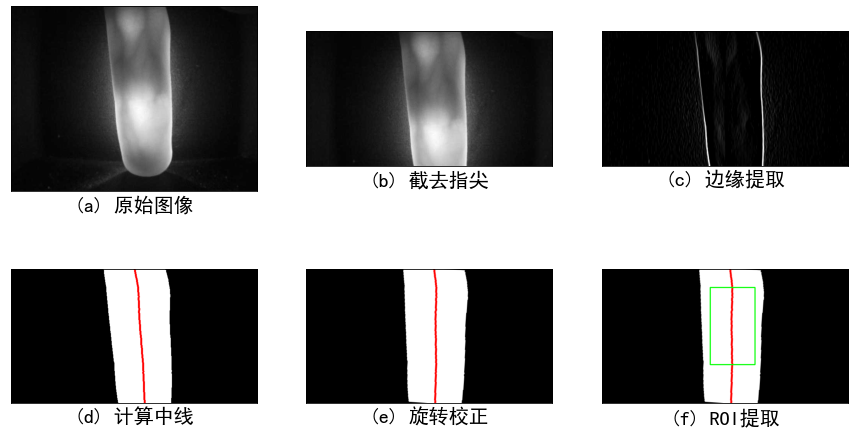

In [3]:
finger = FingerROIExtracter()
img = cv2.imread("finger/001_1/06.jpg", cv2.IMREAD_GRAYSCALE)
finger.draw(img)

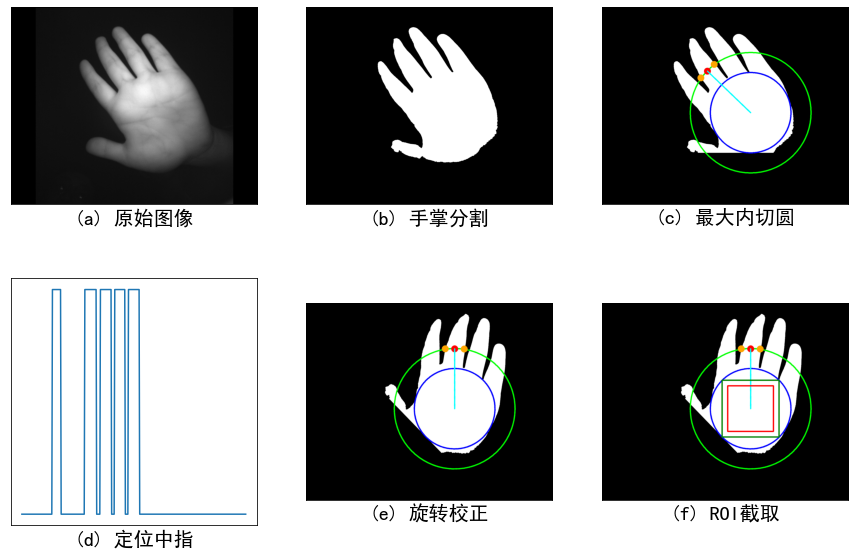

In [4]:
palm = PalmROIExtracter()
img = cv2.imread("palm/203/203_1.bmp", cv2.IMREAD_GRAYSCALE)
palm.draw(img)

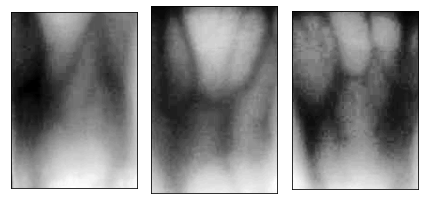

In [5]:
roi_f0 = cv2.imread("ROI_finger/0/1.png", cv2.IMREAD_GRAYSCALE)
roi_f1 = cv2.imread("ROI_finger/1/1.png", cv2.IMREAD_GRAYSCALE)
roi_f2 = cv2.imread("ROI_finger/2/1.png", cv2.IMREAD_GRAYSCALE)
fig, axs = plt.subplots(1, 3)
plt.setp(axs, xticks=[], yticks=[])
plt.tight_layout()
axs[0].imshow(roi_f0, cmap="gray")
axs[1].imshow(roi_f1, cmap="gray")
axs[2].imshow(roi_f2, cmap="gray")
plt.savefig("pics/fingers.png")
plt.show()


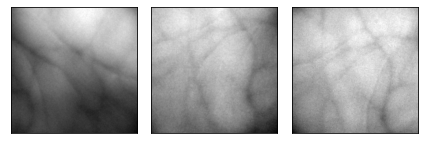

In [6]:
roi_p0 = cv2.imread("ROI_palm/0/1.png", cv2.IMREAD_GRAYSCALE)
roi_p1 = cv2.imread("ROI_palm/1/1.png", cv2.IMREAD_GRAYSCALE)
roi_p2 = cv2.imread("ROI_palm/2/1.png", cv2.IMREAD_GRAYSCALE)
fig, axs = plt.subplots(1, 3)
plt.setp(axs, xticks=[], yticks=[])
plt.tight_layout()
axs[0].imshow(roi_p0, cmap="gray")
axs[1].imshow(roi_p1, cmap="gray")
axs[2].imshow(roi_p2, cmap="gray")
plt.savefig("pics/palms.png")
plt.show()

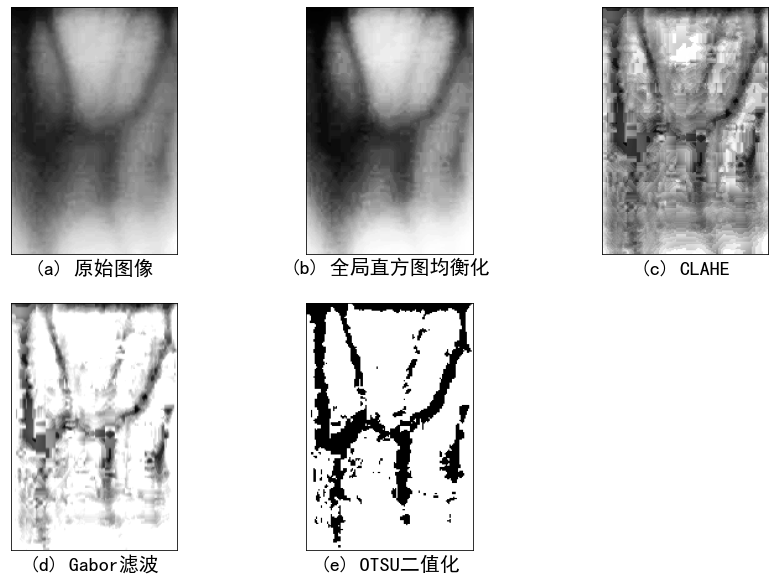

In [7]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
plt.setp(axs, xticks=[], yticks=[])

axs[0, 0].imshow(roi_f1, cmap="gray")
axs[0, 0].set_title("(a) 原始图像", y=0, pad=-20, fontsize=20)
eq = EqualHist()(roi_f1)
axs[0, 1].imshow(eq, cmap="gray")
axs[0, 1].set_title("(b) 全局直方图均衡化", y=0, pad=-20, fontsize=20)

cl = CLAHE(clip_limit=50, tile_grid_size=(11, 11))(eq)
axs[0, 2].imshow(cl, cmap="gray")
axs[0, 2].set_title("(c) CLAHE", y=0, pad=-20, fontsize=20)

ga = Gabor(kernel_size=(9, 9),
        sigma=0.7,
        theta=np.pi / 2,
        lambd=18.3,
        gamma=20,
        psi=0.1)(cl)
axs[1, 0].imshow(ga, cmap="gray")
axs[1, 0].set_title("(d) Gabor滤波", y=0, pad=-20, fontsize=20)

th = OTSU()(ga)
axs[1, 1].imshow(th, cmap="gray")
axs[1, 1].set_title("(e) OTSU二值化", y=0, pad=-20, fontsize=20)

axs[1, 2].remove()
plt.savefig("pics/enhance_finger.png")
plt.show()

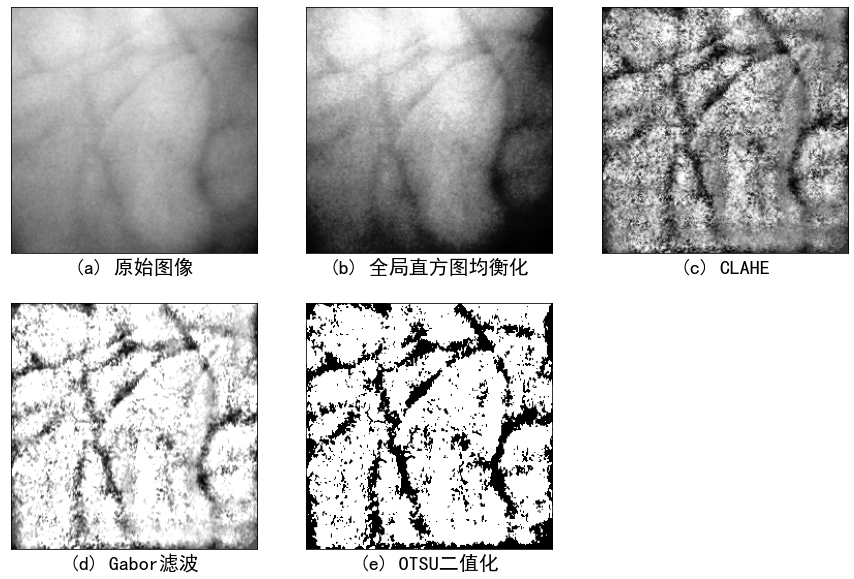

In [8]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
plt.setp(axs, xticks=[], yticks=[])

axs[0, 0].imshow(roi_p1, cmap="gray")
axs[0, 0].set_title("(a) 原始图像", y=0, pad=-20, fontsize=20)
eq = EqualHist()(roi_p1)
axs[0, 1].imshow(eq, cmap="gray")
axs[0, 1].set_title("(b) 全局直方图均衡化", y=0, pad=-20, fontsize=20)

cl = CLAHE(clip_limit=50, tile_grid_size=(11, 11))(eq)
axs[0, 2].imshow(cl, cmap="gray")
axs[0, 2].set_title("(c) CLAHE", y=0, pad=-20, fontsize=20)

ga = Gabor(kernel_size=(9, 9),
        sigma=0.7,
        theta=np.pi / 2,
        lambd=18.3,
        gamma=20,
        psi=0.1)(cl)
axs[1, 0].imshow(ga, cmap="gray")
axs[1, 0].set_title("(d) Gabor滤波", y=0, pad=-20, fontsize=20)

th = OTSU()(ga)
axs[1, 1].imshow(th, cmap="gray")
axs[1, 1].set_title("(e) OTSU二值化", y=0, pad=-20, fontsize=20)

axs[1, 2].remove()
plt.savefig("pics/enhance_palm.png")
plt.show()

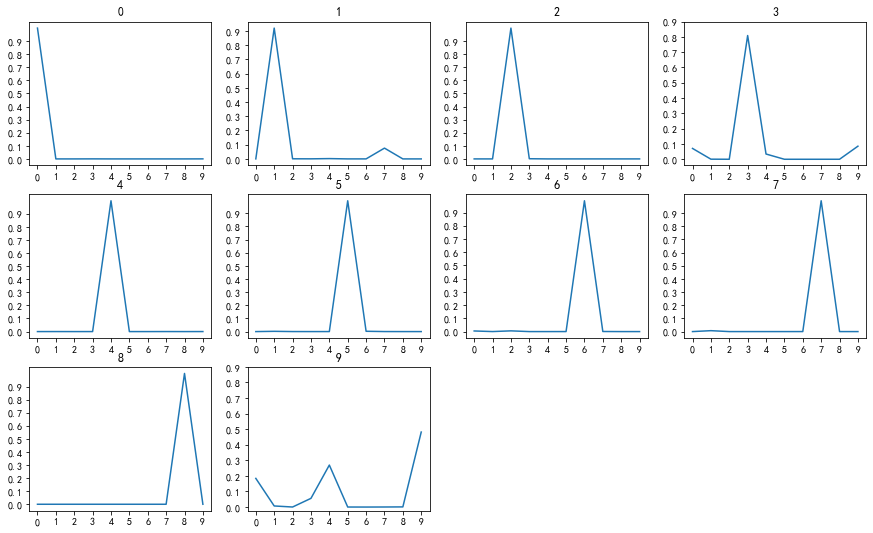

In [9]:
model_finger = models.vgg19()
model_finger.classifier[6] = nn.Linear(in_features=4096, out_features=10)
datasets = {'train': FingerDataset(), 'val': FingerDataset(is_val=True)}
dataloaders = {
    x: DataLoader(datasets[x], batch_size=20, shuffle=False)
    for x in ['train', 'val']
}
finger_dict = torch.load("finger.pt")
model_finger.load_state_dict(finger_dict)
visulize(model_finger, dataloaders, dataset='finger')

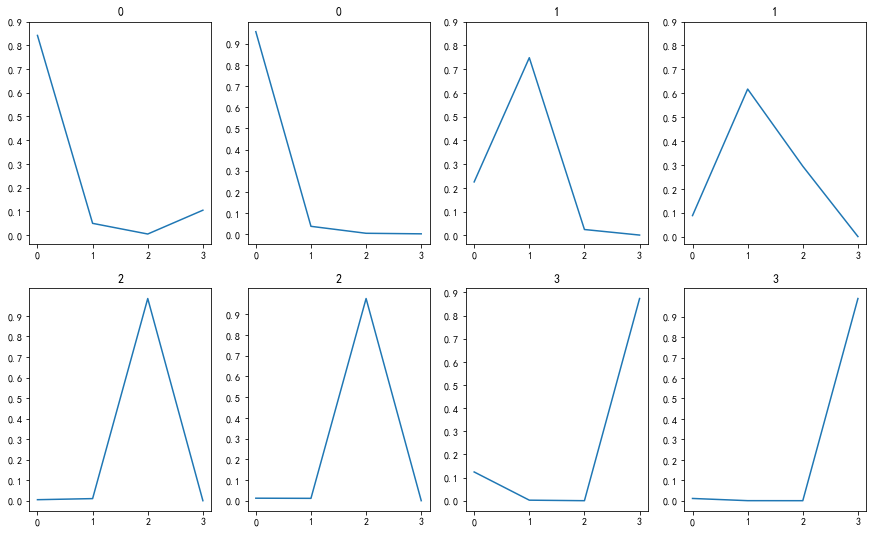

In [10]:
model_palm = models.vgg19()
model_palm.classifier[6] = nn.Linear(in_features=4096, out_features=4)
datasets = {'train': PalmDataset(), 'val': PalmDataset(is_val=True)}
dataloaders = {
    x: DataLoader(datasets[x], batch_size=20, shuffle=False)
    for x in ['train', 'val']
}
palm_dict = torch.load("palm.pt")
model_palm.load_state_dict(palm_dict)
visulize(model_palm, dataloaders, dataset='palm')